In [1]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
max_words = 10000
maxlen = 500

(input_train, y_train), (input_test, y_test)= imdb.load_data(num_words=max_words)

In [5]:
print("Training Dataset-->>")
print(type(input_train)), print(type(y_train))
print(input_train.shape), print(y_train.shape)
print("\nTest Dataset-->>")
print(type(input_test)), print(type(y_test))
print(input_test.shape), print(y_test.shape)

Training Dataset-->>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000,)
(25000,)

Test Dataset-->>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000,)
(25000,)


(None, None)

In [20]:
print(input_train[0])
print("\n", input_train.dtype) 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

 object


### Preparing training dataset -- Already tokenized, so just need to pad_sequences

In [8]:
from tensorflow.keras.preprocessing import sequence 
x_train = sequence.pad_sequences(input_train, maxlen=maxlen)
x_test = sequence.pad_sequences(input_train, maxlen=maxlen)

In [33]:
### In-general we need to make the dtype float and in range (0-1) before feeding to NN beacuse--
# 1. Since here each idx represents a word 
# 2. Secondly we are first passing to Embedding layer which deals with this and gives float values in b/w 0-1. 

In [32]:
print(x_train.shape)
print(x_test.shape)
x_train.dtype, x_train[0][252:312]

(25000, 500)
(25000, 500)


(dtype('int32'),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,   14,   22,
          16,   43,  530,  973, 1622, 1385,   65,  458, 4468,   66, 3941,
           4,  173,   36,  256,    5,   25,  100,   43,  838,  112,   50,
         670,    2,    9,   35,  480]))

In [9]:
from tensorflow.keras import Input
from tensorflow.keras import layers, Model

embedding_dim = 100

def simpleLSTM(input_shape, num_clases):
    inputs = Input(shape=input_shape)
    
    x = layers.Embedding(max_words, embedding_dim)(inputs)
    x = layers.LSTM(32)(x)
    
    if num_clases ==1:
        units = 1
        activation = "sigmoid"
        
    else:
        units=num_clases
        activation = "softmax"
        
    outputs = layers.Dense(units,  activation=activation)(x)
    
    return Model(inputs, outputs)

model = simpleLSTM((maxlen,), num_clases=1)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer='rmsprop',
    loss="binary_crossentropy",
    metrics=["acc"],
)

# my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=3),
#     tf.keras.callbacks.ModelCheckpoint("../models/simpleRNN.{epoch:02d}_{val_acc:.2f}.h5")
# ]

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_split=0.2,

)

Epoch 1/10
157/157 [==============================] - 80s 512ms/step - loss: 0.4514 - acc: 0.7901 - val_loss: 0.3482 - val_acc: 0.8576
Epoch 2/10
157/157 [==============================] - 76s 482ms/step - loss: 0.2704 - acc: 0.8955 - val_loss: 0.4480 - val_acc: 0.8354
Epoch 3/10
157/157 [==============================] - 79s 500ms/step - loss: 0.2187 - acc: 0.9173 - val_loss: 0.3128 - val_acc: 0.8884
Epoch 4/10
157/157 [==============================] - 80s 507ms/step - loss: 0.1867 - acc: 0.9314 - val_loss: 0.2997 - val_acc: 0.8884
Epoch 5/10
157/157 [==============================] - 78s 499ms/step - loss: 0.1609 - acc: 0.9424 - val_loss: 0.3019 - val_acc: 0.8902
Epoch 6/10
157/157 [==============================] - 80s 509ms/step - loss: 0.1441 - acc: 0.9489 - val_loss: 0.3132 - val_acc: 0.8878
Epoch 7/10
157/157 [==============================] - 81s 519ms/step - loss: 0.1266 - acc: 0.9548 - val_loss: 0.3179 - val_acc: 0.8812
Epoch 8/10
157/157 [==============================] - 8

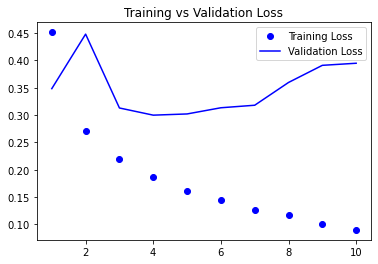

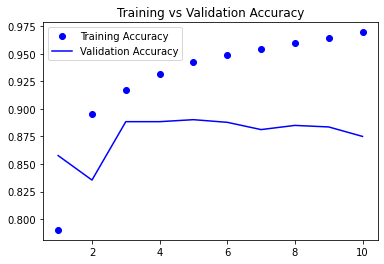

In [13]:
train_acc = history.history["acc"]
val_acc = history.history["val_acc"]

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(train_loss)+1)

plt.title("Training vs Validation Loss")
plt.plot(epochs, train_loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.legend()
plt.show()

plt.title("Training vs Validation Accuracy")
plt.plot(epochs, train_acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.legend()
plt.show()